### Classificação em Aprendizado de Máquina

A classificação é um tipo de aprendizado supervisionado onde o objetivo é prever a categoria de entrada de um conjunto de classes. Ao contrário da regressão, que prevê um valor contínuo, a classificação prediz uma categoria discreta.

#### Tipos de Classificação

1. **Classificação Binária**: Classificação com duas classes. Por exemplo, determinar se um email é spam ou não spam.
2. **Classificação Multiclasse**: Classificação com mais de duas classes. Por exemplo, classificar uma fruta como maçã, banana ou cereja.
3. **Classificação Multilabel**: Cada exemplo pode pertencer a mais de uma classe. Por exemplo, um filme pode ser classificado em múltiplos gêneros.

#### Métricas para Avaliar Modelos de Classificação

Avaliar a performance de um modelo de classificação é crucial para entender como o modelo irá se comportar em dados não vistos. Algumas métricas comuns incluem:

1. **Acurácia**: A proporção de predições corretas feitas pelo modelo.
`Acurácia = (Verdadeiros Positivos + Verdadeiros Negativos) / (Total de Amostras)`
   - **Valores bons**: Mais próximo de 1.
   - **Valores ruins**: Mais próximo de 0.

2. **Precisão**: A proporção de predições positivas corretas.
`Precisão = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Positivos)`
   - **Valores bons**: Maior precisão significa menos falsos positivos.
   - **Valores ruins**: Mais próximo de 0.

3. **Recall**: A proporção de observações positivas reais que foram previstas corretamente.
`Recall = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)`
   - **Valores bons**: Maior recall significa menos falsos negativos.
   - **Valores ruins**: Mais próximo de 0.

4. **F1-Score**: A média harmônica de Precisão e Recall, útil quando você deseja balancear Precisão e Recall.
`F1-Score = 2 * (Precisão * Recall) / (Precisão + Recall)`
   - **Valores bons**: Mais próximo de 1, indicando bom balanceamento entre Precisão e Recall.
   - **Valores ruins**: Mais próximo de 0.

5. **Curva ROC e Área Abaixo da Curva (AUC-ROC)**: A curva ROC mostra a capacidade do modelo de distinguir entre as classes. A AUC fornece uma agregação da performance em todos os limiares de classificação possíveis.
   - **Valores bons**: Mais próximo de 1, indicando excelente discriminação entre as classes.
   - **Valores ruins**: Mais próximo de 0.5, indicando nenhuma discriminação.

6. **Matriz de Confusão**: Uma tabela que mostra as frequências de classificação para cada classe. Não tem valores "bons" ou "ruins" em si, mas é útil para entender o tipo de erros que o modelo está cometendo.

A seleção de métricas depende do problema específico, das necessidades do negócio e das características do conjunto de dados. Compreender essas métricas e seus valores ideais pode ajudar na otimização e seleção do modelo mais apropriado.

#### Algoritmos Comuns de Classificação

Existem diversos algoritmos usados para classificação, como:

- Regressão Logística
- Máquinas de Suporte Vetorial (SVM)
- Árvores de Decisão e Florestas Aleatórias
- Redes Neurais

A escolha do algoritmo depende das características dos dados, dos requisitos do problema e da interpretabilidade desejada.

## Métricas

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def metricas_classificacao(y_real, y_pred):
    # Calcular métricas
    metrics = {
        "Acurácia": accuracy_score(y_real, y_pred),
        "Precisão (macro)": precision_score(y_real, y_pred, average='macro'),
        "Recall (macro)": recall_score(y_real, y_pred, average='macro'),
        "F1-Score (macro)": f1_score(y_real, y_pred, average='macro')
    }

    # Printar métricas
    for key, value in metrics.items():
        print(f"{key}: {value}")

    # Calcular a Matriz de Confusão
    confusion_mat = confusion_matrix(y_real, y_pred)

    # Printar Matriz de Confusão
    print("Matriz de Confusão:")
    sns.heatmap(confusion_mat, annot=True, cmap='YlGnBu', fmt='g')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

    return metrics


``Média Macro``: Calcula a métrica independente para cada classe e, em seguida, toma a média (portanto, trata todas as classes igualmente). É útil quando você quer que cada classe tenha o mesmo peso na métrica global, independentemente de quantas amostras há em cada classe. É uma boa opção quando as classes estão desbalanceadas e você quer uma métrica que não seja influenciada por isso.

`Média Micro`: Calcula a métrica globalmente, considerando cada elemento da matriz de confusão. É útil quando você quer que a métrica reflita a distribuição de classes no conjunto de dados.

`Média Weighted`: Calcula a métrica para cada classe e toma a média, ponderando as métricas pelo número de verdadeiros exemplos em cada classe. É útil quando você quer que a métrica reflita a distribuição de classes, mas ainda leve em conta o desempenho em cada classe individual.

`Sem Média`: Você também pode optar por não usar nenhuma média e, em vez disso, calcular a métrica para cada classe individualmente.

## Classificação Binária

Acurácia: 0.7988826815642458
Precisão (macro): 0.7951112877583466
Recall (macro): 0.7866795366795367
F1-Score (macro): 0.789906103286385
Matriz de Confusão:


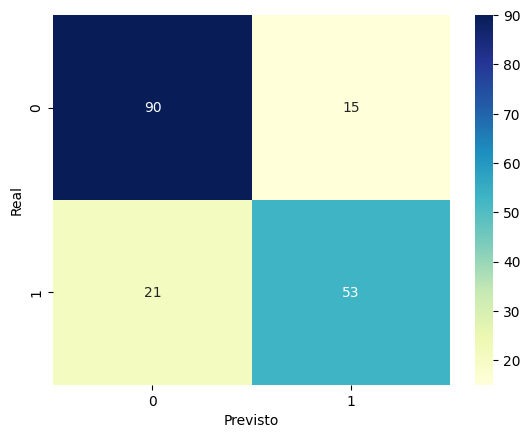

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar os dados
df = pd.read_csv('titanic.csv') # Caminho do arquivo

# Selecionar colunas relevantes e preencher valores ausentes (pode-se fazer um pré-processamento mais completo)
df = df[['classe_da_passagem', 'sexo', 'idade', 'irmaos_a_bordo', 'pais_ou_filhos_a_bordo', 'valor_bilhete', 'sobreviveu']]
df['sexo'] = df['sexo'].map({'male': 0, 'female': 1})
df['idade'].fillna(df['idade'].mean(), inplace=True)

# Dividir os dados em recursos (X) e alvo (y)
X = df.drop('sobreviveu', axis=1)
y = df['sobreviveu']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os recursos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e ajustar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Prever o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo usando a função "joker"
metrics = metricas_classificacao(y_test, y_pred)

## Classificação Multiclasse

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
iris = load_iris()
X = iris.data
y = iris.target

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression

# Inicializar e ajustar o modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Prever as classes para os dados de teste
y_pred = model.predict(X_test)

Acurácia: 1.0
Precisão (macro): 1.0
Recall (macro): 1.0
F1-Score (macro): 1.0
Matriz de Confusão:


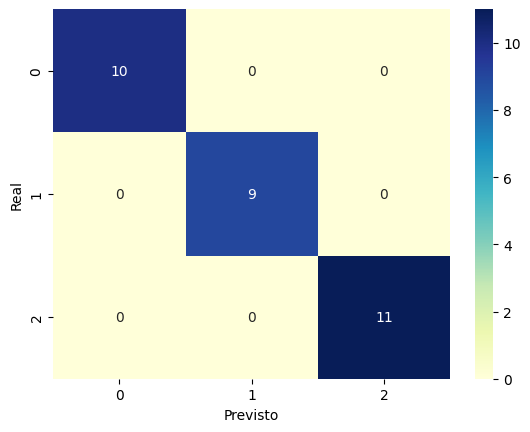

In [5]:
metricas = metricas_classificacao(y_test, y_pred)

# Biblioteca

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Regressão em Machine Learning

A regressão é uma técnica de aprendizado de máquina supervisionada utilizada para prever uma quantidade contínua. Ela encontra a relação entre as variáveis dependentes (saída) e independentes (características) em um conjunto de dados.

## Tópicos

### 1. Tipos de Regressão

#### a. Regressão Linear Simples
A regressão linear simples encontra a relação linear entre uma variável independente (X) e a variável dependente (Y). A relação é representada como uma linha reta.

#### b. Regressão Linear Múltipla
A regressão linear múltipla encontra a relação entre várias variáveis independentes (X1, X2, ..., Xn) e a variável dependente (Y).

#### c. Regressão Polinomial
A regressão polinomial modela a relação como uma equação polinomial. É útil quando os dados têm uma relação curvilínea.

`A regressão polinomial é uma forma de análise de regressão que modela a relação entre uma variável dependente
y e uma ou mais variáveis independentes X usando uma equação polinomial. Ao contrário da regressão linear simples, que modela a relação como uma linha reta, a regressão polinomial pode capturar relações mais complexas que são curvilíneas ou não lineares.`
#### d. Regressão de Ridge e Lasso
Ridge e Lasso são técnicas de regularização que ajudam a evitar o overfitting no modelo.

### 2. Avaliação de Modelos de Regressão

Root Mean Square Error (RMSE):

O que é: A raiz quadrada da média dos erros quadráticos, medindo a diferença entre os valores que o modelo prevê e os valores reais.
O que nos diz: Oferece uma noção da magnitude dos erros do modelo, penalizando mais fortemente grandes erros.
Valor Ideal: Quanto mais próximo de 0, melhor.

#### Mean Square Error (MSE):
- O que é: A média dos erros quadráticos.
- O que nos diz: Semelhante ao RMSE, mostra o quão bem o modelo está ajustado, com maior penalização para grandes erros.
- Valor Ideal: O valor ideal é 0.

#### Mean Absolute Error (MAE):
- O que é: A média dos valores absolutos dos erros.
- O que nos diz: Fornece uma medida das previsões erradas sem penalizar grandes erros tanto quanto o MSE e o RMSE.
- Valor Ideal: 0, significando que as previsões estão perfeitamente corretas.

#### Median Absolute Error:
- O que é: A mediana dos valores absolutos dos erros.
- O que nos diz: Dá uma ideia de como o modelo está performando em um caso "típico" e é menos sensível a outliers.
- Valor Ideal: 0 é o valor ideal.

#### Explained Variance Score:
- O que é: Mostra a proporção da variação total na variável dependente que é capturada pelo modelo.
- O que nos diz: Um valor mais alto indica que o modelo explica uma grande parte da variabilidade nos dados.
- Valor Ideal: 100% é o valor ideal.

#### R2 Score:
- O que é: A porcentagem da variação da variável dependente que é previsível a partir das variáveis independentes.
- O que nos diz: Um valor mais alto significa que mais variações são explicadas pelo modelo, o que é desejável.
- Valor Ideal: 100% é o valor ideal.

#### Adjusted R2:
- O que é: Semelhante ao R2, mas ajustado com base no número de preditores no modelo.
- O que nos diz: Dá uma medida mais realista de quão bem o modelo se ajusta aos dados, especialmente quando se adiciona mais variáveis.
- Valor Ideal: 100% seria ideal, mas em geral, um valor que seja próximo ou igual ao R2 é considerado bom.


## Regressão Linear Simples

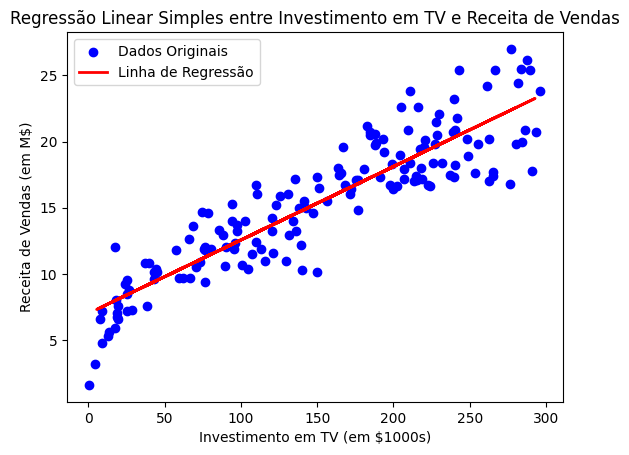

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Carregar os dados
data = pd.read_csv('publicidade.csv') # Supondo que o arquivo está neste caminho
X = data[['TV']]
y = data['Sales']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prever vendas para os dados de teste
y_pred = model.predict(X_test)

# Plotar os dados originais e a linha de regressão
plt.scatter(X_train, y_train, color='blue', label='Dados Originais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('Investimento em TV (em $1000s)')
plt.ylabel('Receita de Vendas (em M$)')
plt.legend()
plt.title('Regressão Linear Simples entre Investimento em TV e Receita de Vendas')
plt.show()


In [8]:
#df =  pd.read_csv('train.csv',sep =';')

#df['FaturaMensal'] = df['FaturaMensal'].fillna(pd.mean(df['FaturaMensal']))

#model = LogisticRegression().fit(X_train, y_train)
#train_pred = model.predict(X_train)

## Regressão Linear Múltipla

Mean Squared Error: 2.846616122131541


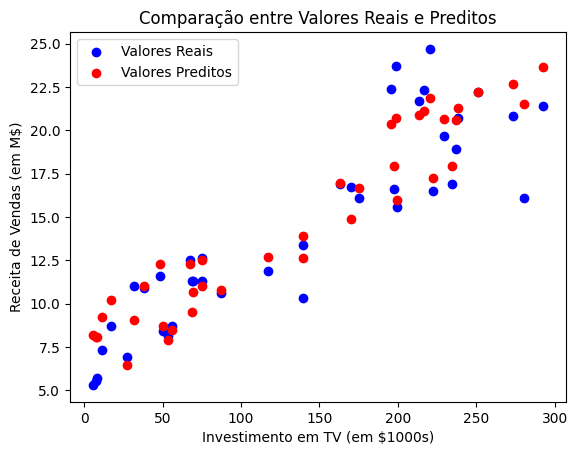

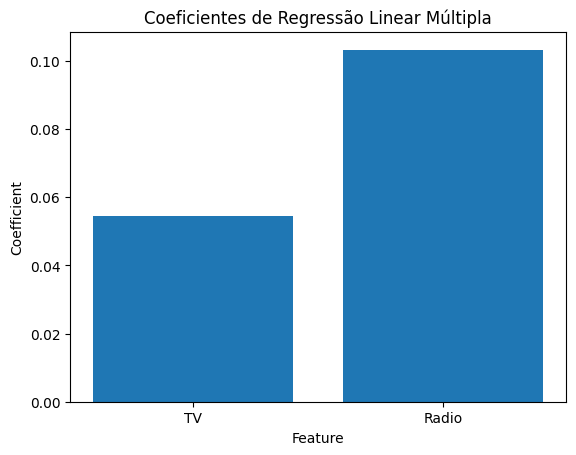

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Carregar os dados
data = pd.read_csv('publicidade.csv') # Supondo que o arquivo está neste caminho
X = data[['TV', 'Radio']]
y = data['Sales']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prever vendas para os dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo (opcional)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Plotar os valores reais
plt.scatter(X_test['TV'], y_test, color='blue', label='Valores Reais')

# Plotar os valores preditos
plt.scatter(X_test['TV'], y_pred, color='red', label='Valores Preditos')

plt.xlabel('Investimento em TV (em $1000s)')
plt.ylabel('Receita de Vendas (em M$)')
plt.legend()
plt.title('Comparação entre Valores Reais e Preditos')
plt.show()

# Plotar os coeficientes do modelo
import matplotlib.pyplot as plt
plt.bar(['TV', 'Radio'], model.coef_)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Coeficientes de Regressão Linear Múltipla')
plt.show()

O gráfico de barras que foi gerado pelo código mostra os coeficientes da regressão linear múltipla para as três variáveis independentes: TV, rádio e jornal. Cada barra no gráfico representa um coeficiente associado a uma dessas variáveis.

### 1. **TV**
A barra associada à TV mostra o coeficiente para a variável TV. Este coeficiente indica quanto a receita de vendas (em milhões de dólares) é esperada mudar para cada aumento adicional de $1000 investido em publicidade na TV, mantendo todos os outros fatores constantes.

### 2. **Rádio**
Similarmente, a barra associada à rádio indica quanto a receita de vendas é esperada mudar para cada aumento adicional de $1000 investido em publicidade no rádio, com todos os outros fatores mantidos constantes.

### 3. **Jornal**
A barra para a variável jornal mostra o efeito previsto na receita de vendas para cada aumento adicional de $1000 investido em publicidade em jornais, mantendo todos os outros fatores constantes.

Os coeficientes podem ser positivos ou negativos. Um coeficiente positivo significa que há uma relação positiva entre a variável e as vendas, ou seja, um aumento no investimento em publicidade para essa mídia está associado a um aumento nas vendas. Um coeficiente negativo indicaria uma relação negativa.

O tamanho absoluto das barras dá uma indicação da força da relação entre cada variável e as vendas. Por exemplo, se a barra para a TV for significativamente maior do que as outras, isso sugere que o investimento em publicidade na TV tem um efeito maior na receita de vendas do que o investimento em rádio ou jornal.

Em suma, este gráfico fornece uma representação visual da magnitude e direção dos efeitos das diferentes variáveis independentes no modelo de regressão. Isso pode ajudar a entender quais variáveis têm os maiores efeitos sobre a variável dependente e em que direção.


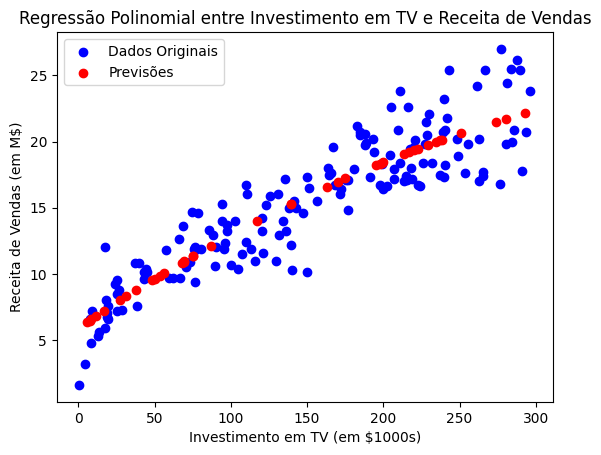

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('publicidade.csv') # Supondo que o arquivo está neste caminho
X = data[['TV']]
y = data['Sales']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformar as características usando PolynomialFeatures
poly = PolynomialFeatures(degree=2) # Grau 2 para uma parábola
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Inicializar e ajustar o modelo de regressão linear com as características polinomiais
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Prever vendas para os dados de teste
y_pred = model.predict(X_test_poly)

# Plotar os dados originais e a curva de regressão polinomial
plt.scatter(X_train, y_train, color='blue', label='Dados Originais')
plt.scatter(X_test, y_pred, color='red', label='Previsões')
plt.xlabel('Investimento em TV (em $1000s)')
plt.ylabel('Receita de Vendas (em M$)')
plt.legend()
plt.title('Regressão Polinomial entre Investimento em TV e Receita de Vendas')
plt.show()


## Um exemplo mais prático:
A base de dados abaixo nos retorna dados com vários atributos e no final qual foi o valor do bitcoin no dia.
Cada linha (registro) possui os valores de um dia específico, de 2009 até um dia antes do dia atual.

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')
df

<ipython-input-11-09e1a18c3bc2>:1: DtypeWarning: Columns (147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv')


,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,2024-08-07,714826.0,9237.0,3054089.0,20274624.0,970.0,544891.0,9552897.0,43.0,99624.0,...,1.009470e+10,0.388015,21391.190826,0.001379,76.035490,5.082548,0.028550,0.027561,56048.08,coinbase-btc-usd-spot
5696,2024-08-08,722252.0,9234.0,3055008.0,20288108.0,971.0,544903.0,9554100.0,43.0,99637.0,...,8.956322e+09,0.238288,14752.133121,0.000868,53.718257,5.078216,0.029799,0.034668,55148.10,coinbase-btc-usd-spot
5697,2024-08-09,705635.0,9226.0,3053814.0,20295776.0,975.0,545004.0,9551367.0,42.0,99634.0,...,1.008339e+10,0.326488,19824.655613,0.001030,62.556535,5.075492,0.029834,0.034873,61705.58,coinbase-btc-usd-spot
5698,2024-08-10,594175.0,9232.0,3052838.0,20287312.0,974.0,544930.0,9548051.0,41.0,99652.0,...,3.279784e+09,0.131600,8010.693156,0.000773,47.036059,5.068791,0.029718,0.034833,60862.13,coinbase-btc-usd-spot


# Como podemos fazer para prever o valor do dia seguinte?
Se nossa classe alvo não existe (valor do dia seguinte)

In [12]:
lista_original = [1,2,3,4]
lista = [1,2,3,4]
print('Lista original', lista)

# Exclui o primeiro registro da lista
lista.pop(0)
print('Lista sem o primeiro registro', lista)

# Acrescenta zero ao último valor da lista
lista.append(0)
print('Lista com 0 na última posição', lista)

df_exemplo = pd.DataFrame()
df_exemplo['Valor Original'] = lista_original
df_exemplo['Valor Alterado'] = lista
df_exemplo

Lista original [1, 2, 3, 4]
Lista sem o primeiro registro [2, 3, 4]
Lista com 0 na última posição [2, 3, 4, 0]


,Valor Original,Valor Alterado
0,1,2
1,2,3
2,3,4
3,4,0


Se considerarmos que cada dia é uma linha, agora temos a coluna valor Alterado com o valor do dia seguinte

In [13]:
df.shape

(5700, 148)

In [14]:
# Cria uma lista com os valores do preço do bitcoin nos dias
lista_preco = list(df['PriceUSD'].values)

# Remove o primeiro elemento desta lista
lista_preco.pop(0)

#Acrescenta 0 no final
lista_preco.append(0)

# Cria a coluna preco_dia_seguinte e acrescenta a lista que alteramos
df['preco_dia_seguinte'] = lista_preco

df.shape

(5700, 149)

In [15]:
df.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd,preco_dia_seguinte
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Apagar nulos na coluna PriceUSD
df.dropna(subset=['PriceUSD'], inplace = True)

# Apagar nulos na coluna preco_dia_seguinte
df.dropna(subset=['preco_dia_seguinte'], inplace = True)
df.shape

(5137, 149)

In [17]:
# Apagar todas colunas com mais de 1 valor nulo
null_counts = df.isnull().sum()
colunas_apagar = null_counts[null_counts > 1].index.tolist()
colunas_apagar

['CapMrktEstUSD',
 'NVTAdj90',
 'NVTAdjFF90',
 'ROI1yr',
 'ROI30d',
 'ReferenceRateETH',
 'ReferenceRateEUR',
 'VtyDayRet180d',
 'VtyDayRet30d',
 'principal_market_price_usd',
 'principal_market_usd']

In [18]:
df.drop(colunas_apagar, axis = 1, inplace  = True)
df.shape

(5137, 138)

In [19]:
df['time']

,time
561,2010-07-18
562,2010-07-19
563,2010-07-20
564,2010-07-21
565,2010-07-22
...,...
5693,2024-08-05
5694,2024-08-06
5695,2024-08-07
5696,2024-08-08


In [20]:
df['time'] = pd.to_datetime(df['time'])
df['time']

,time
561,2010-07-18
562,2010-07-19
563,2010-07-20
564,2010-07-21
565,2010-07-22
...,...
5693,2024-08-05
5694,2024-08-06
5695,2024-08-07
5696,2024-08-08


In [21]:
df['time'].dt.year

,time
561,2010
562,2010
563,2010
564,2010
565,2010
...,...
5693,2024
5694,2024
5695,2024
5696,2024


In [22]:
# Criar as colunas de data
df['ano'] = df['time'].dt.year
df['mes'] = df['time'].dt.month
df['dia'] = df['time'].dt.day
df['dia_semana'] =df['time'].dt.day_of_week
df['dia_ano'] =df['time'].dt.day_of_year

No geral, tem como colocar uma data no modelo de machine learning?

In [23]:
df[['time']]

,time
561,2010-07-18
562,2010-07-19
563,2010-07-20
564,2010-07-21
565,2010-07-22
...,...
5693,2024-08-05
5694,2024-08-06
5695,2024-08-07
5696,2024-08-08


In [24]:
# Cria um dataframe com as datas apenas para plotar os gráficos com as datas
datas = df[['time']].copy(deep=True)

# Exclui a coluna de data da base
df.drop(['time'], axis = 1, inplace  = True)

In [25]:
# Retorna a correlação dos atributos com o valor que queremos prever
correlation_matrix = df.corr()['preco_dia_seguinte']
correlation_matrix

,preco_dia_seguinte
AdrActCnt,0.658589
AdrBal1in100KCnt,-0.083522
AdrBal1in100MCnt,0.753258
AdrBal1in10BCnt,0.807659
AdrBal1in10KCnt,0.379330
...,...
ano,0.774680
mes,-0.070921
dia,-0.005974
dia_semana,0.000021


In [26]:
# Identificar as colunas com pouca correlação ao preco_dia_seguinte
colunas_interesse = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover = correlation_matrix[(correlation_matrix >= -0.3) & (correlation_matrix <= 0.3)].index.tolist()
colunas_remover = [coluna for coluna in colunas_remover if coluna not in colunas_interesse]
colunas_remover

['AdrBal1in100KCnt',
 'AdrBal1in1MCnt',
 'AdrBalNtv100Cnt',
 'AdrBalNtv10KCnt',
 'BlkCnt',
 'CapMVRVCur',
 'CapMVRVFF',
 'FeeByteMeanNtv',
 'FeeMeanNtv',
 'FeeMedNtv',
 'FeeTotNtv',
 'FlowInExNtv',
 'FlowOutExNtv',
 'NVTAdjFF',
 'RevHashNtv',
 'RevHashRateNtv',
 'RevHashRateUSD',
 'RevHashUSD',
 'SplyAct180d',
 'SplyAct1d',
 'SplyAct1yr',
 'SplyAct2yr',
 'SplyAct30d',
 'SplyAct7d',
 'SplyAct90d',
 'SplyAdrBal1in1K',
 'SplyAdrBalNtv10K',
 'TxTfrValAdjNtv',
 'TxTfrValMeanNtv',
 'TxTfrValMedNtv']

In [27]:
# Apagar as colunas com pouca correlação ao preco_dia_seguinte
df.drop(colunas_remover, axis=1, inplace = True)
df.shape

(5137, 112)

In [28]:
# Exclui todas as linhas que possuem ao menos 1 registro nulo
df.dropna(inplace=True)
df.shape

(5136, 112)

In [29]:
X = df.drop(['preco_dia_seguinte'], axis = 1)
y = df[['preco_dia_seguinte']]

scale_X = MinMaxScaler()
X = scale_X.fit_transform(X)

scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)


X_train, X_temp, y_train, y_temp = train_test_split(X,y, shuffle=True, test_size=0.30, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, shuffle=True, test_size=0.5, random_state=50)

# Isto é apenas para plotar gráficos de datas com as previsões
X_train_data, X_temp_data, y_train_data, y_temp_data = train_test_split(datas['time'],datas['time'], shuffle=True, test_size=0.30, random_state=50)
X_test_data, X_val_data, y_test_data, y_val_data = train_test_split(X_temp_data, y_temp_data, shuffle=True, test_size=0.5, random_state=50)

## Define o Modelo

In [30]:
input_dim = X.shape[1]

# Criar um modelo sequencial
model = Sequential()
# Adicionar a primeira camada densa com 64 unidades, função de ativação relu
model.add(Dense(64, input_dim=input_dim, activation='relu'))
# Adicionar uma segunda camada densa com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar a camada de saída com 1 unidade, função de ativação linear
model.add(Dense(1, activation='linear'))
# Compilar o modelo com o otimizador adam e a função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Treina o modelo

In [31]:
# Ajustar o modelo aos dados de treinamento
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose = 0)

In [32]:
predict = model.predict(X_test)
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scale_y.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scale_y.inverse_transform(predict)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


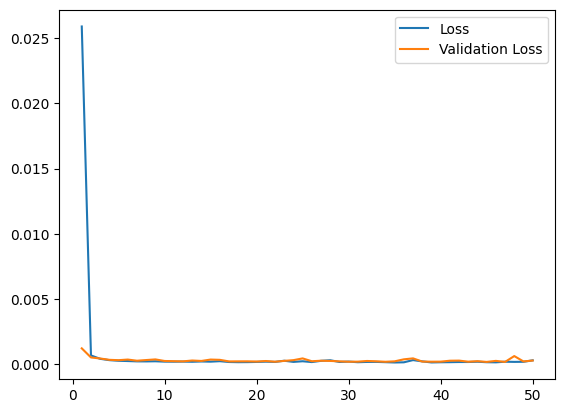

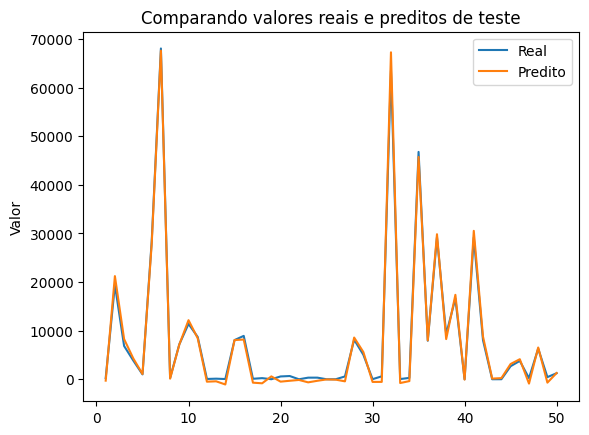

In [33]:
loss_history = history.history['loss']
val_loss_history = history.history['val_loss']

# Definimos os valores do eixo x (as épocas)
x = [y+1 for y in range(0,len(loss_history))]

plt.plot(x, loss_history, label = "Loss")
plt.plot(x, val_loss_history, label = "Validation Loss")
plt.legend()
plt.show()

grafico_x = [x for x in range(1,len(y_test_desnormalizado[:50])+1)]
plt.plot(grafico_x, y_test_desnormalizado[:50], label='Real')
plt.plot(grafico_x, predict_desnormalizado[:50], label='Predito')
plt.title('Comparando valores reais e preditos de teste')
plt.legend()
plt.ylabel('Valor')
plt.show()

In [34]:
import sklearn.metrics as sm
import numpy as np
# Função Joker para avaliar modelos de regressão
def metrics(X_test,predict, real):
    k = X_test.shape[1]
    n = len(X_test)
    r2 = sm.r2_score(real, predict)
    adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
    print('Root Mean Square Error: ',round(np.sqrt(np.mean(np.array(predict) - np.array(real))**2),2))
    print('Mean Square Error:', round(sm.mean_squared_error(real, predict ),2))
    print('Mean Absolut Error:', round(sm.mean_absolute_error(real, predict ),2))
    print('Median Absolut Error:', round(sm.median_absolute_error(real, predict ),2))
    print('Explain Variance Score:', round(sm.explained_variance_score(real, predict)*100,2))
    print('R2 score:', round(sm.r2_score(real, predict)*100,2))
    print('Adjusted R2 =', round(adj_r2,3)*100)

In [35]:
metrics(X_test,predict_desnormalizado, y_test_desnormalizado)

Root Mean Square Error:  139.49
Mean Square Error: 1320693.6
Mean Absolut Error: 817.82
Median Absolut Error: 634.9
Explain Variance Score: 99.62
R2 score: 99.62
Adjusted R2 = 99.6


In [36]:
df_predito = pd.DataFrame()
df_predito['Data'] = X_test_data
df_predito = df_predito.iloc[:-1]
df_predito['Real'] = list(y_test_desnormalizado.flatten())
df_predito['Predito'] = list(predict_desnormalizado.flatten())
df_predito.sort_values(by='Real', inplace=True)

In [37]:
df_predito

,Data,Real,Predito
569,2010-07-26,0.058911,135.761826
4101,2020-03-27,0.060000,-178.358185
3652,2019-01-03,0.060012,-292.693359
564,2010-07-21,0.060593,-120.727798
636,2010-10-01,0.061065,-205.246414
...,...,...,...
4663,2021-10-10,69347.815260,70788.554688
3387,2018-04-13,69424.914175,72333.437500
721,2010-12-25,69663.011907,71679.515625
5564,2024-03-29,71432.728302,72708.148438


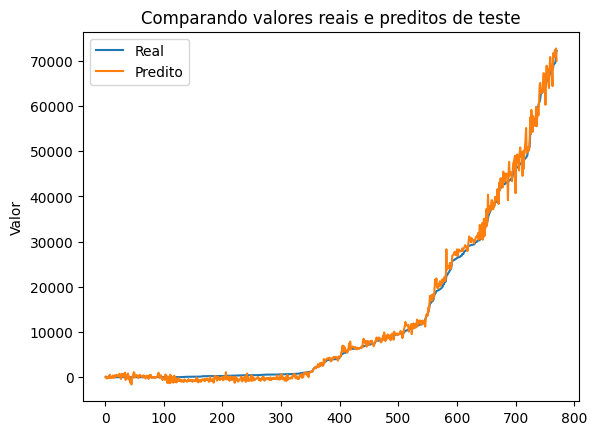

In [38]:
grafico_x = [x for x in range(1,len(df_predito)+1)]
plt.plot(grafico_x, df_predito.Real, label='Real')
plt.plot(grafico_x, df_predito.Predito, label='Predito')
plt.title('Comparando valores reais e preditos de teste')
plt.legend()
plt.ylabel('Valor')
plt.show()

# Exercício

1 - BITCOIN - Utilize a mesma estrutura de modelo para os exercícios de A até F
* A ) Treine um modelo para realizar a previsão do valor do bitcoin sem remover as colunas menos relevantes e exiba as métricas
* B ) Treine um modelo para realizar a previsão do valor do bitcoin removendo as colunas com o filtro (correlation_matrix >= -0.3) & (correlation_matrix <= 0.3) e exiba as métricas
* C ) Treine um modelo para realizar a previsão do valor do bitcoin removendo as colunas com o filtro (correlation_matrix >= -0.4) & (correlation_matrix <= 0.4) e exiba as métricas
* D ) Treine um modelo para realizar a previsão do valor do bitcoin removendo as colunas com o filtro (correlation_matrix >= -0.5) & (correlation_matrix <= 0.5) e exiba as métricas
* E ) Treine um modelo para realizar a previsão do valor do bitcoin removendo as colunas com o filtro (correlation_matrix >= -0.6) & (correlation_matrix <= 0.6) e exiba as métricas
* F ) Treine um modelo para realizar a previsão do valor do bitcoin removendo as colunas com o filtro (correlation_matrix >= -0.7) & (correlation_matrix <= 0.7) e exiba as métricas
* G ) Qual foi o modelo que obteve os melhores resultados?

In [39]:
# A
# Ajustar o modelo aos dados de treinamento
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose = 0)

predict = model.predict(X_test)
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scale_y.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scale_y.inverse_transform(predict)

metrics(X_test,predict_desnormalizado, y_test_desnormalizado)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Root Mean Square Error:  88.08
Mean Square Error: 702821.72
Mean Absolut Error: 423.82
Median Absolut Error: 178.48
Explain Variance Score: 99.8
R2 score: 99.8
Adjusted R2 = 99.8


In [40]:
# B
# Retorna a correlação dos atributos com o valor que queremos prever
correlation_matrix = df.corr()['preco_dia_seguinte']
correlation_matrix

colunas_interesse = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover = correlation_matrix[(correlation_matrix >= -0.3) & (correlation_matrix <= 0.3)].index.tolist()
colunas_remover = [coluna for coluna in colunas_remover if coluna not in colunas_interesse]

X = df.drop(['preco_dia_seguinte'], axis = 1)
X = df.drop(colunas_remover, axis = 1)
y = df[['preco_dia_seguinte']]

scale_X = MinMaxScaler()
X = scale_X.fit_transform(X)

scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(X,y, shuffle=True, test_size=0.30, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, shuffle=True, test_size=0.5, random_state=50)

input_dim = X.shape[1]

# Criar um modelo sequencial
model = Sequential()
# Adicionar a primeira camada densa com 64 unidades, função de ativação relu
model.add(Dense(64, input_dim=input_dim, activation='relu'))
# Adicionar uma segunda camada densa com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar a camada de saída com 1 unidade, função de ativação linear
model.add(Dense(1, activation='linear'))
# Compilar o modelo com o otimizador adam e a função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar o modelo aos dados de treinamento
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose = 0)

predict = model.predict(X_test)
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scale_y.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scale_y.inverse_transform(predict)

metrics(X_test,predict_desnormalizado, y_test_desnormalizado)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Root Mean Square Error:  158.41
Mean Square Error: 408073.89
Mean Absolut Error: 382.18
Median Absolut Error: 221.04
Explain Variance Score: 99.89
R2 score: 99.88
Adjusted R2 = 99.9


In [41]:
# C
# Retorna a correlação dos atributos com o valor que queremos prever
correlation_matrix = df.corr()['preco_dia_seguinte']
correlation_matrix

colunas_interesse = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover = correlation_matrix[(correlation_matrix >= -0.4) & (correlation_matrix <= 0.4)].index.tolist()
colunas_remover = [coluna for coluna in colunas_remover if coluna not in colunas_interesse]

X = df.drop(['preco_dia_seguinte'], axis = 1)
X = df.drop(colunas_remover, axis = 1)
y = df[['preco_dia_seguinte']]

scale_X = MinMaxScaler()
X = scale_X.fit_transform(X)

scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(X,y, shuffle=True, test_size=0.30, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, shuffle=True, test_size=0.5, random_state=50)

input_dim = X.shape[1]

# Criar um modelo sequencial
model = Sequential()
# Adicionar a primeira camada densa com 64 unidades, função de ativação relu
model.add(Dense(64, input_dim=input_dim, activation='relu'))
# Adicionar uma segunda camada densa com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar a camada de saída com 1 unidade, função de ativação linear
model.add(Dense(1, activation='linear'))
# Compilar o modelo com o otimizador adam e a função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar o modelo aos dados de treinamento
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose = 0)

predict = model.predict(X_test)
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scale_y.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scale_y.inverse_transform(predict)

metrics(X_test,predict_desnormalizado, y_test_desnormalizado)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Root Mean Square Error:  338.05
Mean Square Error: 515602.65
Mean Absolut Error: 471.19
Median Absolut Error: 308.77
Explain Variance Score: 99.88
R2 score: 99.85
Adjusted R2 = 99.8


In [42]:
# D
# Retorna a correlação dos atributos com o valor que queremos prever
correlation_matrix = df.corr()['preco_dia_seguinte']
correlation_matrix

colunas_interesse = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover = correlation_matrix[(correlation_matrix >= -0.5) & (correlation_matrix <= 0.5)].index.tolist()
colunas_remover = [coluna for coluna in colunas_remover if coluna not in colunas_interesse]

X = df.drop(['preco_dia_seguinte'], axis = 1)
X = df.drop(colunas_remover, axis = 1)
y = df[['preco_dia_seguinte']]

scale_X = MinMaxScaler()
X = scale_X.fit_transform(X)

scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(X,y, shuffle=True, test_size=0.30, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, shuffle=True, test_size=0.5, random_state=50)

input_dim = X.shape[1]

# Criar um modelo sequencial
model = Sequential()
# Adicionar a primeira camada densa com 64 unidades, função de ativação relu
model.add(Dense(64, input_dim=input_dim, activation='relu'))
# Adicionar uma segunda camada densa com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar a camada de saída com 1 unidade, função de ativação linear
model.add(Dense(1, activation='linear'))
# Compilar o modelo com o otimizador adam e a função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar o modelo aos dados de treinamento
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose = 0)

predict = model.predict(X_test)
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scale_y.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scale_y.inverse_transform(predict)

metrics(X_test,predict_desnormalizado, y_test_desnormalizado)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Root Mean Square Error:  336.89
Mean Square Error: 522253.58
Mean Absolut Error: 499.37
Median Absolut Error: 377.98
Explain Variance Score: 99.88
R2 score: 99.85
Adjusted R2 = 99.8


In [44]:
# E
# Retorna a correlação dos atributos com o valor que queremos prever
correlation_matrix = df.corr()['preco_dia_seguinte']
correlation_matrix

colunas_interesse = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover = correlation_matrix[(correlation_matrix >= -0.6) & (correlation_matrix <= 0.6)].index.tolist()
colunas_remover = [coluna for coluna in colunas_remover if coluna not in colunas_interesse]

X = df.drop(['preco_dia_seguinte'], axis = 1)
X = df.drop(colunas_remover, axis = 1)
y = df[['preco_dia_seguinte']]

scale_X = MinMaxScaler()
X = scale_X.fit_transform(X)

scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(X,y, shuffle=True, test_size=0.30, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, shuffle=True, test_size=0.5, random_state=50)

input_dim = X.shape[1]

# Criar um modelo sequencial
model = Sequential()
# Adicionar a primeira camada densa com 64 unidades, função de ativação relu
model.add(Dense(64, input_dim=input_dim, activation='relu'))
# Adicionar uma segunda camada densa com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar a camada de saída com 1 unidade, função de ativação linear
model.add(Dense(1, activation='linear'))
# Compilar o modelo com o otimizador adam e a função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar o modelo aos dados de treinamento
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose = 0)

predict = model.predict(X_test)
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scale_y.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scale_y.inverse_transform(predict)

metrics(X_test,predict_desnormalizado, y_test_desnormalizado)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Root Mean Square Error:  8.08
Mean Square Error: 343952.17
Mean Absolut Error: 347.4
Median Absolut Error: 209.22
Explain Variance Score: 99.9
R2 score: 99.9
Adjusted R2 = 99.9


In [45]:
# F
# Retorna a correlação dos atributos com o valor que queremos prever
correlation_matrix = df.corr()['preco_dia_seguinte']
correlation_matrix

colunas_interesse = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover = correlation_matrix[(correlation_matrix >= -0.7) & (correlation_matrix <= 0.7)].index.tolist()
colunas_remover = [coluna for coluna in colunas_remover if coluna not in colunas_interesse]

X = df.drop(['preco_dia_seguinte'], axis = 1)
X = df.drop(colunas_remover, axis = 1)
y = df[['preco_dia_seguinte']]

scale_X = MinMaxScaler()
X = scale_X.fit_transform(X)

scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(X,y, shuffle=True, test_size=0.30, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, shuffle=True, test_size=0.5, random_state=50)

input_dim = X.shape[1]

# Criar um modelo sequencial
model = Sequential()
# Adicionar a primeira camada densa com 64 unidades, função de ativação relu
model.add(Dense(64, input_dim=input_dim, activation='relu'))
# Adicionar uma segunda camada densa com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar a camada de saída com 1 unidade, função de ativação linear
model.add(Dense(1, activation='linear'))
# Compilar o modelo com o otimizador adam e a função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar o modelo aos dados de treinamento
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose = 0)

predict = model.predict(X_test)
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scale_y.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scale_y.inverse_transform(predict)

metrics(X_test,predict_desnormalizado, y_test_desnormalizado)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Root Mean Square Error:  186.79
Mean Square Error: 424376.09
Mean Absolut Error: 433.66
Median Absolut Error: 275.85
Explain Variance Score: 99.89
R2 score: 99.88
Adjusted R2 = 99.9


In [46]:
# G
# Melhor modelo foi o F, foi o modelo que minimizou as metricas de Root Mean Square Error, Mean Square Error, Mean Absolut Error e Median Absolut Error.
# Também maximizou o Explain Variance Score, R2 Score e o Adjust R2

2 - Agora que já decidiu qual o melhor filtro, treine 4 estruturas de modelos distintas, exiba as métricas para cada modelo e informe qual o melhor. As estruturas do modelo são:
* A ) Com uma camada oculta
* B ) Com duas camadas ocultas
* C ) Com 5 camadas ocultas
* D ) Com 10 camadas ocultas

In [47]:
# A
# Retorna a correlação dos atributos com o valor que queremos prever
correlation_matrix = df.corr()['preco_dia_seguinte']
correlation_matrix

colunas_interesse = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover = correlation_matrix[(correlation_matrix >= -0.7) & (correlation_matrix <= 0.7)].index.tolist()
colunas_remover = [coluna for coluna in colunas_remover if coluna not in colunas_interesse]

X = df.drop(['preco_dia_seguinte'], axis = 1)
X = df.drop(colunas_remover, axis = 1)
y = df[['preco_dia_seguinte']]

scale_X = MinMaxScaler()
X = scale_X.fit_transform(X)

scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(X,y, shuffle=True, test_size=0.30, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, shuffle=True, test_size=0.5, random_state=50)

input_dim = X.shape[1]

# Criar um modelo sequencial
model = Sequential()
# Adicionar a primeira camada densa com 64 unidades, função de ativação relu
model.add(Dense(64, input_dim=input_dim, activation='relu'))
# Adicionar uma segunda camada densa com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar a camada de saída com 1 unidade, função de ativação linear
model.add(Dense(1, activation='linear'))
# Compilar o modelo com o otimizador adam e a função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar o modelo aos dados de treinamento
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose = 0)

predict = model.predict(X_test)
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scale_y.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scale_y.inverse_transform(predict)

metrics(X_test,predict_desnormalizado, y_test_desnormalizado)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Root Mean Square Error:  25.37
Mean Square Error: 387699.64
Mean Absolut Error: 385.08
Median Absolut Error: 236.98
Explain Variance Score: 99.89
R2 score: 99.89
Adjusted R2 = 99.9


In [48]:
# B
# Retorna a correlação dos atributos com o valor que queremos prever
correlation_matrix = df.corr()['preco_dia_seguinte']
correlation_matrix

colunas_interesse = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover = correlation_matrix[(correlation_matrix >= -0.7) & (correlation_matrix <= 0.7)].index.tolist()
colunas_remover = [coluna for coluna in colunas_remover if coluna not in colunas_interesse]

X = df.drop(['preco_dia_seguinte'], axis = 1)
X = df.drop(colunas_remover, axis = 1)
y = df[['preco_dia_seguinte']]

scale_X = MinMaxScaler()
X = scale_X.fit_transform(X)

scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(X,y, shuffle=True, test_size=0.30, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, shuffle=True, test_size=0.5, random_state=50)

input_dim = X.shape[1]

# Criar um modelo sequencial
model = Sequential()
# Adicionar a primeira camada densa com 64 unidades, função de ativação relu
model.add(Dense(64, input_dim=input_dim, activation='relu'))
# Adicionar uma segunda camada densa com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar uma segunda camada densa (segunda oculta) com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar a camada de saída com 1 unidade, função de ativação linear
model.add(Dense(1, activation='linear'))
# Compilar o modelo com o otimizador adam e a função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar o modelo aos dados de treinamento
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose = 0)

predict = model.predict(X_test)
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scale_y.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scale_y.inverse_transform(predict)

metrics(X_test,predict_desnormalizado, y_test_desnormalizado)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Root Mean Square Error:  1.64
Mean Square Error: 392801.17
Mean Absolut Error: 310.94
Median Absolut Error: 115.01
Explain Variance Score: 99.89
R2 score: 99.89
Adjusted R2 = 99.9


In [49]:
# C
# Retorna a correlação dos atributos com o valor que queremos prever
correlation_matrix = df.corr()['preco_dia_seguinte']
correlation_matrix

colunas_interesse = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover = correlation_matrix[(correlation_matrix >= -0.7) & (correlation_matrix <= 0.7)].index.tolist()
colunas_remover = [coluna for coluna in colunas_remover if coluna not in colunas_interesse]

X = df.drop(['preco_dia_seguinte'], axis = 1)
X = df.drop(colunas_remover, axis = 1)
y = df[['preco_dia_seguinte']]

scale_X = MinMaxScaler()
X = scale_X.fit_transform(X)

scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(X,y, shuffle=True, test_size=0.30, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, shuffle=True, test_size=0.5, random_state=50)

input_dim = X.shape[1]

# Criar um modelo sequencial
model = Sequential()
# Adicionar a primeira camada densa com 64 unidades, função de ativação relu
model.add(Dense(64, input_dim=input_dim, activation='relu'))
# Adicionar uma segunda camada densa com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar uma segunda camada densa (segunda oculta) com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar uma segunda camada densa (Terceira oculta) com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar uma segunda camada densa (Quarta oculta) com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar uma segunda camada densa (Quinta oculta) com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar a camada de saída com 1 unidade, função de ativação linear
model.add(Dense(1, activation='linear'))
# Compilar o modelo com o otimizador adam e a função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar o modelo aos dados de treinamento
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose = 0)

predict = model.predict(X_test)
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scale_y.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scale_y.inverse_transform(predict)

metrics(X_test,predict_desnormalizado, y_test_desnormalizado)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Root Mean Square Error:  137.17
Mean Square Error: 309000.55
Mean Absolut Error: 306.74
Median Absolut Error: 109.08
Explain Variance Score: 99.92
R2 score: 99.91
Adjusted R2 = 99.9


In [50]:
# D
# Retorna a correlação dos atributos com o valor que queremos prever
correlation_matrix = df.corr()['preco_dia_seguinte']
correlation_matrix

colunas_interesse = ['mes', 'dia', 'dia_semana', 'dia_ano', 'PriceUSD']
colunas_remover = correlation_matrix[(correlation_matrix >= -0.7) & (correlation_matrix <= 0.7)].index.tolist()
colunas_remover = [coluna for coluna in colunas_remover if coluna not in colunas_interesse]

X = df.drop(['preco_dia_seguinte'], axis = 1)
X = df.drop(colunas_remover, axis = 1)
y = df[['preco_dia_seguinte']]

scale_X = MinMaxScaler()
X = scale_X.fit_transform(X)

scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(X,y, shuffle=True, test_size=0.30, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, shuffle=True, test_size=0.5, random_state=50)

input_dim = X.shape[1]

# Criar um modelo sequencial
model = Sequential()
# Adicionar a primeira camada densa com 64 unidades, função de ativação relu
model.add(Dense(64, input_dim=input_dim, activation='relu'))
# Adicionar uma segunda camada densa com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar uma segunda camada densa (segunda oculta) com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar uma segunda camada densa (Terceira oculta) com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar uma segunda camada densa (Quarta oculta) com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar uma segunda camada densa (Quinta oculta) com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar uma segunda camada densa (Sexta oculta) com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar uma segunda camada densa (Sétima oculta) com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar uma segunda camada densa (Oitava oculta) com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar uma segunda camada densa (Nona oculta) com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar uma segunda camada densa (Décima oculta) com 32 unidades, função de ativação relu
model.add(Dense(32, activation='relu'))
# Adicionar a camada de saída com 1 unidade, função de ativação linear
model.add(Dense(1, activation='linear'))
# Compilar o modelo com o otimizador adam e a função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar o modelo aos dados de treinamento
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose = 0)

predict = model.predict(X_test)
# Desnormaliza o y_test na variável y_desnormalizado
y_test_desnormalizado = scale_y.inverse_transform(y_test)

# Desnormaliza o predict na variável predict_desnormalizado
predict_desnormalizado = scale_y.inverse_transform(predict)

metrics(X_test,predict_desnormalizado, y_test_desnormalizado)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Root Mean Square Error:  448.98
Mean Square Error: 665613.62
Mean Absolut Error: 512.95
Median Absolut Error: 234.18
Explain Variance Score: 99.87
R2 score: 99.81
Adjusted R2 = 99.8
